<a href="https://colab.research.google.com/github/prisantos/portfolio_datascience/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - Cidade do México

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**.  

Fato curioso que é ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do México, e ver quais insights podem ser extraídos a partir de dados brutos.**

A cidade do México (*Ciudad de México*) é uma capital mais populosa do México e da América do Norte  e de altitude elevada. 

Umas das cidades mais antigas da América do Norte, possui vários pontos turísticos e  abriga uma arquitetura impressionante.

Que tal conhecer a terra de  **Frida Kahlo**?



<center><img alt="Cidade do México" width="70%" src="https://www.infoescola.com/wp-content/uploads/2012/09/cidade-do-m%C3%A9xico_188040947.jpg"></center>




## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Airbnb](https://www.airbnb.com.br/).

Para esta análise exploratória inicial, será utilizado apenas o seguinte arquivo:

listings.csv- Summary information and metrics for listings in Cidade do México (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Também vamos utilizar o pacote Folium para visualização de mapa interativo dentro do nosso notebook. Para isso, é necessário a instalação e importação do pacote. 

In [0]:
pip install folium

In [0]:
import folium


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/mexico/df/mexico-city/2019-11-25/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
*name - nome da propriedade anunciada
*host_id - número de id do proprietário (anfitrião) da propriedade
*host_name - Nome do anfitrião
*neighbourhood_group - esta coluna não contém nenhum valor válido
*neighbourhood - nome do bairro
*latitude - coordenada da latitude da propriedade
*longitude - coordenada da longitude da propriedade
*room_type - informa o tipo de quarto que é oferecido
*price - preço para alugar o imóvel
*minimum_nights - quantidade mínima de noites para reservar
*number_of_reviews - número de reviews que a propriedade possui
*last_review - data do último review
*reviews_per_month - quantidade de reviews por mês
*calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer analise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1995,1,57,2019-05-27,0.50,8,332
1,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3874,1,0,NaN,NaN,2,363
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1898,1,42,2019-11-04,0.43,10,353
3,58955,Entire beautiful duplex in la Roma,282620,Nat,NaN,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1646,3,40,2019-11-07,0.41,1,132
4,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,NaN,Coyoacán,19.35601,-99.16167,Entire home/apt,1065,3,96,2019-11-06,1.01,3,322


Analisando os cinco primeiros registros, percebemos que a coluna `neighbourhood_group` não possui nenhum valor. 
O acrônimo de NaN que significa "*Not a Number*" e indica um valor numérico indefinido ou irrepresentável.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de variáveis e quantas entradas o dataset possui. Também vamos verificar quais são os tipos de variáveis  


In [0]:
# identificar o volume de dados do DataFrame
print("Quantidade de Entradas:\t {}".format(df.shape[0]))
print("Quantidade de Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Quantidade de Entradas:	 20571
Quantidade de Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Conclusões**: 


O Dataset possui 16 variáveis e  20571 entradas.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo *listings.csv*. Há uma versão mais completa com 20571 entradas e 106 variáveis (listings.csv.gz).

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É necessário verificar logo no início se esses valores nulos são significativos comparados ao total de entradas.



In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.213942
last_review                       0.213942
host_name                         0.001507
name                              0.000438
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [0]:
df[['price', 'availability_365', 'number_of_reviews', 'reviews_per_month','minimum_nights','availability_365']]

,price,availability_365,number_of_reviews,reviews_per_month,minimum_nights,availability_365
0,1995,332,57,0.50,1,332
1,3874,363,0,NaN,1,363
2,1898,353,42,0.43,1,353
3,1646,132,40,0.41,3,132
4,1065,322,96,1.01,3,322
...,...,...,...,...,...,...
20566,504,84,0,NaN,3,84
20567,291,348,0,NaN,1,348
20568,504,169,0,NaN,1,169
20569,1801,29,0,NaN,2,29


### **Conclusões:** 
* É possível ver que as colunas `neighbourhood_group`  possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem 21,3 % dos valores nulos.
* A variável `host_name ` tem 0,15%  dos valores nulos. 
* A variável `name ` tem aproximadamente 0,04%  dos valores nulos. 


Podemos verificar que temos alguns valores ausentes na coluna `reviews_per_month`. Essa coluna refere-se aos comentários feito por mês, o que podemos levantar algumas hipóteses: 

1) que algumas acomodações alugadas não receberam avaliações ou 

2) que são acomodações novas que ainda não foram alugados

Na variável `host_name` e `name` a quantidade de dados nulos não possui tanta representatividade no nosso dataset. Então vamos eliminar esses valores.

In [0]:
# eliminar todas as entradas onde existam valores ausentes em `host_name`
df_row_dropna = df.dropna(subset=['host_name'], axis=0)

# eliminar todas as entradas onde existam valores ausentes em `name`
df_row_dropna = df.dropna(subset=['name'], axis=0)

# comparar o antes e o depois de `host_name`
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_row_dropna.shape))

Antes:	(20571, 16)
Depois:	(20562, 16)


### **Q3. Qual o tipo de distribuição das variáveis?** 

Para analise sobre a distribuição dos dados, iremos plotar os histogramas. Foram plotados histogramas para cada uma das variáveis numéricas do *dataset*.

Vamos verificar a quantidade de valores nulos 

In [0]:
df.isnull().sum()

id                                    0
name                                  9
host_id                               0
host_name                            31
neighbourhood_group               20571
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4401
reviews_per_month                  4401
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Podemos verificar que as variáveis ´last_review´ e ´reviews_per_month´ possui a mesma quantidade de valores ausentes. 
Não podemos eliminar esses valores ausentes, pois pode interferir na nossa análise. Uma hipótese para essa quantidade é que 
podem ser acomodações novas ou acomodações que não receberam avaliações.

### **Q4. Há outliers presentes?**
Através da distribuição do histograma é possível verificar a presença de outliers. Eles são dados que são drasticamente diferente dos demais, um ponto fora da curva. Que quando não tratados pode inteferir nos resultados obtidos da análise.

Podemos verificar das entradas das variáveis `price`, `minimum_nights` e `calculated_host_listings_count` não seguem uma distribuição. 

Para confirmar a presença dos outliers vamos utilizar as seguintes etapas:

a) Resumo estatístico por meio do método `describe()`


In [0]:
#resumo estatístico das variaveis numericas 
df[['calculated_host_listings_count', 'minimum_nights', 'price', 'reviews_per_month', 'number_of_reviews', 'availability_365' ]].describe()

,calculated_host_listings_count,minimum_nights,price,reviews_per_month,number_of_reviews,availability_365
count,20571.000000,20571.000000,20571.000000,16170.000000,20571.000000,20571.000000
mean,4.714744,3.760196,1150.935054,1.825876,23.028827,210.830490
std,8.391954,22.178327,3601.870920,1.858464,39.639857,135.301748
min,1.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,407.000000,0.450000,1.000000,85.000000
50%,2.000000,2.000000,697.000000,1.190000,7.000000,207.000000
75%,4.000000,2.000000,1259.000000,2.630000,27.000000,350.000000
max,58.000000,1122.000000,349994.000000,17.320000,523.000000,365.000000


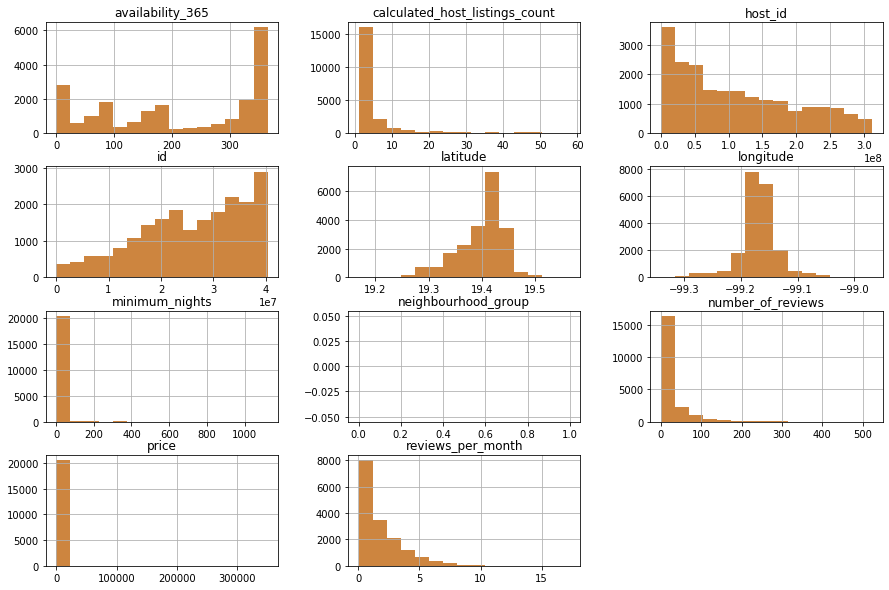

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color = "#CD853F");

### **Conclusões:**


a) A coluna `availability_365` descreve a quantidade de acomodações disponíveis no ano. Observou que diversas acomodações não estão disponíveis ao longo do ano e que não estão disponíveis em nenhum dia do ano.

b)  Outra coluna `host_id` que representa a identificação do anfitrião, percebemos que existe uma grande quantidade de ids maiores que possivelmente deve represetar a ordem crescente dos cadastros. Podemos chegar na hipótese de um crescimento da plataforma pela quantidade de cadastros. 

c) Na `latitude` e `altitude` percebemos que uma concentração nos pontos centrais. Seriam áreas urbanas? Próximo a área central?

d) Podemos verificar que em algumas coluna existe a presença de outliers como na coluna `preço` não condizem com a realidade. Para 34.000 em uma diária é bem fora do comum. É necessário realizar a remoção desses outliers. 

e) A coluna `neighbourhood_group` não contém nenhum dado. Iremos utilizar a latitude e altitude para agrupar os grupos de bairros em uma mapa interativo utilizando o pacote  *Folium*


### **Boxplot para Mínimo de Noites**

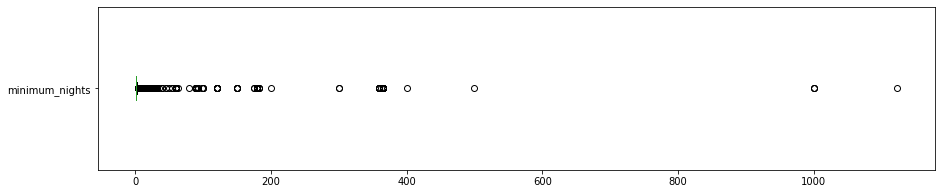

Mínimo de noites : valores acima de 30:
148 entradas
0.7195%


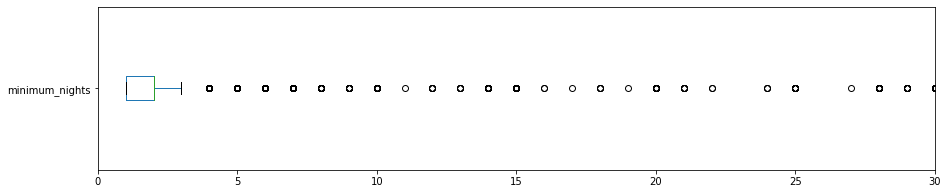

In [0]:
# minimo de noites
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimo de noites
print("Mínimo de noites : valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

df.minimum_nights.plot(kind='box', vert=False, xlim=(0,30), figsize=(15,3));


### **Boxplot para Preço**

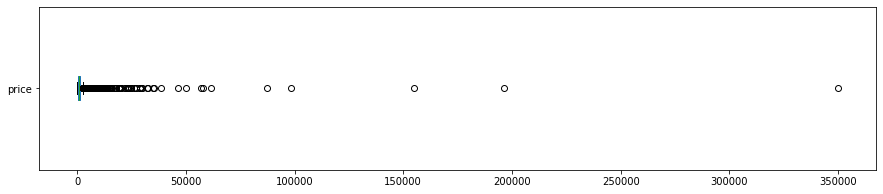


price: valores acima de 2800
1275 entradas
6.1980%


In [0]:
# preço
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()


# ver quantidade de valores acima de 2800 para price
print("\nprice: valores acima de 2800")
print("{} entradas".format(len(df[df.price > 2800])))
print("{:.4f}%".format((len(df[df.price > 2800]) / df.shape[0])*100))



### **Vamos realizar a limpeza de dados**

In [0]:
#limpar  os outliers 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price <= 0].index, axis=0, inplace=True)


Agora vamos plotar novamente os gráficos 

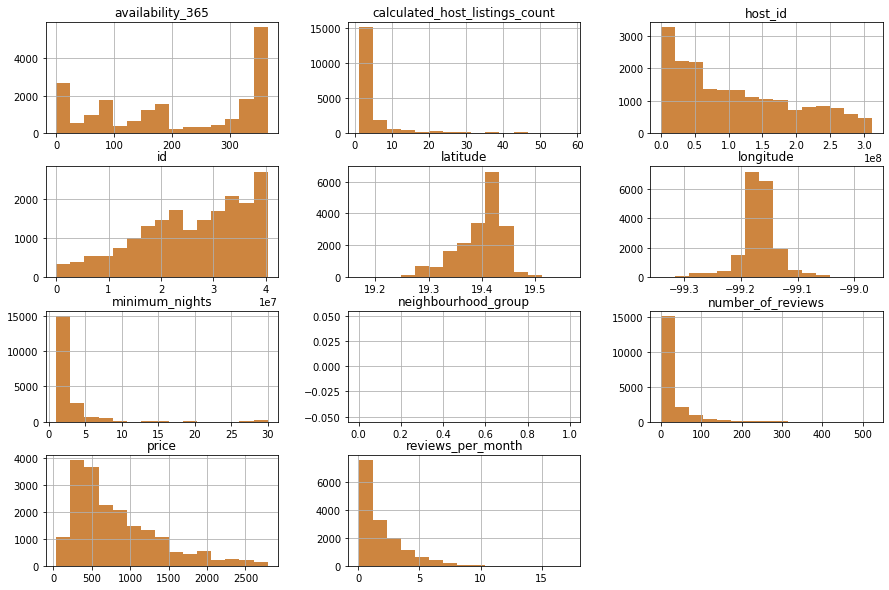

In [0]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = "#CD853F");

In [0]:
from folium import plugins
lat = df['latitude'][:500].values
long = df['longitude'][:500].values

coordenadas = []

city_mexico = folium.Map(location=[-19.4194815,-99.1916445],    # Coordenadas retiradas do Google Maps
    zoom_start=3)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

city_mexico.add_child(plugins.HeatMap(coordenadas))
city_mexico



Através do mapa interativo, percebemos uma maior concentração nos bairros centrais. 

###**Q6. Qual a média dos preços do aluguel?**


In [0]:
df_clean['price'].describe()

count    19152.000000
mean       820.214234
std        562.394382
min         39.000000
25%        387.000000
50%        659.000000
75%       1104.000000
max       2789.000000
Name: price, dtype: float64

Podemos observar que a média dos preços de 659 por dia e o preço máximo é de 1.491. E a metade das acomodações está na faixa de 581.

### **Q5. Qual a correlação existente entre as variáveis**?

###**Correlação**

Correlação é uma análise que mede o grau de dependência entre duas variáveis. 

É necessário compreender que a correlação pode não ter um sentido de causa e efeito. Mas que a ligação entre as variáveis não implica necessariamente um condição para a ocorrência do outro, mas pode indicar possíveis causas que podem ser analisadas através da análise conjunta da matriz de correlação.

<center><img alt="" width="100%" src="http://comcept.org/wp-content/uploads/oldmedia/autismo-cectic.png"></center>


Aqui está um exemplo disso: 

Essa charge foi baseada na pesquisa de um ex-médico  chamado Andrew Wakefield que associou  a vacina MMR (que protege contra o sarampo, rubéola e a caxumba) e o desenvolvimento de comportamento autista em algumas crianças. Causando assim, um alarde aos pais que decidiram não vacinar seus filhos, trazendo de volta algumas doenças consideradas erradicadas.




In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.049947,0.117299,0.082100,0.181332,0.049387
minimum_nights,-0.049947,1.000000,-0.104226,-0.172750,-0.073990,-0.023381
number_of_reviews,0.117299,-0.104226,1.000000,0.558948,0.075434,0.078485
reviews_per_month,0.082100,-0.172750,0.558948,1.000000,0.135074,0.048997
calculated_host_listings_count,0.181332,-0.073990,0.075434,0.135074,1.000000,0.130022
availability_365,0.049387,-0.023381,0.078485,0.048997,0.130022,1.000000


Outra forma de plotar uma correlação entre as variáveis é através do **HeatMap** - Mapa de Calor,  uma representação gráfica de dados. 


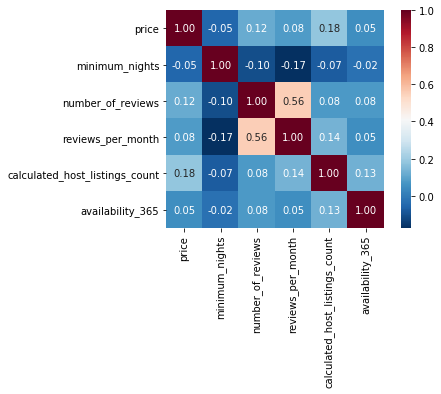

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu_r', fmt='.2f', square=True, linecolor='white', annot=True);

Observando o HeatMap as cores mais aproximadas do vermelho representam uma alta correlação, enquanto os valores mais próximo ao azul, indicam uma baixa correlação.

Observamos que existe uma  linha central que traz uma alta correlação com o valor 1.0 que é apenas uma associação com as mesmas colunas no eixo x e y. 

As colunas que trazem uma correlação positiva são `reviews_per_month` e `number_of_reviews`com 0.57. Que podemos inferir que a quantidade de reviews por mês aumenta consequentemente  o  número de reviews.


 Uma outra observação é a variável `price` e `calculated_host_listings_count`. O que podemos inferir que os imóveis mais caros são de locadores que possui mais anúncios. 

O `price` também tem correlação negativa com `number_of_reviews` e `reviews_per_month` o que podemos deduzir que os imóveis mais caros são os que possuem menos reviews. O que podemos concluir que esse imóveis são esporadicamente não são alugados. 

As colunas que possuem correlação negativa são  `availability_365` e  `minium_nights`. Podemos concluir que as acomadações disponíveis mais vezes no ano, são aquelas que possuem o menor número de noites mínimas. 

Outra correlação negativa são `price` e `minium_nights` que podemos deduzir que imóveis mais caros possuem um maior número de noites.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9219
Private room       9202
Hotel room          385
Shared room         346
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
tipos_q = df_clean.room_type.value_counts()

quarto_percentual = tipos_q / df_clean.shape[0];
pd.DataFrame(quarto_percentual).style.format('{:.2%}')

,room_type
Entire home/apt,48.14%
Private room,48.05%
Hotel room,2.01%
Shared room,1.81%


Dos imóveis disponíveis no DataFrame, aproximadamente: 
 

* 48,14% são quartos privativos
* 48,05% são casas ou apartamentos alugados 
* 2,01 % são quartos compartilhados
* 1,81% são quartos de hotel 

Demonstrando que a quantidade de quartos privativos tem percentuais similares.






### **Q8. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Miguel Hidalgo            1043.750521
Cuajimalpa de Morelos     1023.010256
Cuauhtémoc                 938.088702
Álvaro Obregón             762.113229
La Magdalena Contreras     696.029630
Benito Juárez              656.347053
Coyoacán                   646.456674
Milpa Alta                 634.187500
Venustiano Carranza        580.507003
Tlalpan                    548.786585
Name: price, dtype: float64

## **Conclusões:**

Analisando a lista de preços por bairros e pesquisa em site de viagem, chegamos a seguinte hipotése: Um bairro como o Coyoacán que possui um Mercado conhecido e o museu da Frida Kahlo e que  aparece em várias listas de melhores bairros provavelmente apareceria entre as cinco regiões mais caras. 



Os links utilizados para essa conclusão estão a seguir:

a) [TripAdivsor](https://www.tripadvisor.com.br/Attractions-g150800-Activities-c47-t34-Mexico_City_Central_Mexico_and_Gulf_Coast.html)

b) [Quero viajar mais](https://www.queroviajarmais.com/onde-ficar-se-hospedar-cidade-do-mexico/)

c) [Airbnb - Cidade do México](https://www.airbnb.com.br/locations/mexico-city)



Como esses bairros não estão no nosso dataset, vamos ter que ***minerar*** mais os dados.

Vamos analisar através da quantidade de móveis em cada bairro. 



In [0]:
df_clean["neighbourhood"].value_counts().sort_values(ascending = False)[:10]

Cuauhtémoc               7497
Benito Juárez            3207
Miguel Hidalgo           2878
Coyoacán                 1708
Álvaro Obregón            892
Tlalpan                   820
Cuajimalpa de Morelos     390
Venustiano Carranza       357
Gustavo A. Madero         329
Iztacalco                 261
Name: neighbourhood, dtype: int64

Verificamos uma distribuição diferente da anterior. Temos alguns bairros com menos de 37 imóveis, então pela média há uma dispersão de dados. 

Vamos verificar os cinco primeiras acomodações do bairro mais caro da nossa primeira analise "Cuajimalpa de Morelos"

In [0]:
df_clean[df_clean.neighbourhood == "Cuajimalpa de Morelos"][:10]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
116,783480,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.35213,-99.28565,Private room,349,2,26,2018-12-16,0.38,2,360
364,2730414,Hermosa casa estilo chalet a 7 min de Santa Fe,13973690,Helen,NaN,Cuajimalpa de Morelos,19.34912,-99.29076,Entire home/apt,600,2,0,NaN,NaN,1,262
383,2894095,Two room suite into the best hotel of Santa Fe,14791549,Juan Pablo,NaN,Cuajimalpa de Morelos,19.35965,-99.27968,Entire home/apt,1918,2,82,2019-10-20,1.29,3,354
504,3843651,Santa Fe luxury apartment @ Distrito Capital H...,19464589,María & José,NaN,Cuajimalpa de Morelos,19.35932,-99.27838,Hotel room,2692,2,74,2019-11-14,1.26,2,365
699,5013545,"Big, charming house with garden, 5min. to Sant...",159138,Philip,NaN,Cuajimalpa de Morelos,19.34067,-99.30935,Entire home/apt,1278,30,0,NaN,NaN,2,362
763,5340024,Cozy suite in Santa Fe área,27670506,Eva,NaN,Cuajimalpa de Morelos,19.36601,-99.27123,Entire home/apt,1220,2,16,2017-02-07,0.30,2,0
836,5750544,"Santa Fe,Ibero,ITESM,Recamara",4129056,Janet,NaN,Cuajimalpa de Morelos,19.35414,-99.28533,Private room,387,2,13,2019-11-02,0.30,2,356
882,6018314,Habitación en zona exclusiva,31239663,Liz,NaN,Cuajimalpa de Morelos,19.36841,-99.29375,Private room,600,1,1,2019-02-17,0.11,1,365
999,6541442,LOCATION & COMFORT IN SANTA FE,24168308,Cesar,NaN,Cuajimalpa de Morelos,19.35742,-99.28325,Entire home/apt,1550,3,22,2019-07-19,0.43,1,359
1018,6646524,"Amueblado, renta meses completos",34057930,Suites,NaN,Cuajimalpa de Morelos,19.39387,-99.26021,Private room,659,1,0,NaN,NaN,1,365


In [0]:
df_clean[df_clean.neighbourhood == "Cuauhtémoc"][:10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.44076,-99.16324,Private room,1995,1,57,2019-05-27,0.50,8,332
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Private room,1898,1,42,2019-11-04,0.43,10,353
3,58955,Entire beautiful duplex in la Roma,282620,Nat,NaN,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1646,3,40,2019-11-07,0.41,1,132
7,99972,Dreamy suite w/ king size bed in boutique B&B,87973,Diego,NaN,Cuauhtémoc,19.44268,-99.16371,Private room,2789,1,0,NaN,NaN,8,317
12,175504,"Casa Comtesse B&B, Gallery Hotel, 7 rooms",838896,Thomas Pierre,NaN,Cuauhtémoc,19.40631,-99.17303,Private room,1414,1,52,2019-10-31,0.56,4,122
13,180808,"Huge Luxurious Suite 70's style, perfectly loc...",36836,Roberto,NaN,Cuauhtémoc,19.42428,-99.16843,Entire home/apt,1046,2,35,2019-11-18,0.38,1,357
14,187030,Colorful and spacious Apt. Family favorite,899360,Julian,NaN,Cuauhtémoc,19.41033,-99.17647,Entire home/apt,1123,3,97,2019-09-29,0.99,6,0
15,187745,Extraordinarily Spacious Apt. in Condesa,899360,Julian,NaN,Cuauhtémoc,19.41086,-99.17704,Entire home/apt,1840,2,24,2018-01-03,0.33,6,36
16,194937,Sunny and fresh Retro style Apartment,899360,Julian,NaN,Cuauhtémoc,19.41113,-99.17762,Entire home/apt,1162,3,64,2019-10-29,0.66,6,176
17,198778,Smack in the Middle of La Condesa,970609,Morgana & Omar,NaN,Cuauhtémoc,19.41395,-99.17948,Entire home/apt,930,2,161,2019-06-17,1.61,2,287


Observando os dois demonstrativos de acomadações dos bairros **"Cuajimalpa de Morelos"** e **"Cuauhtémoc"**. O último apresenta uma maior quantidade de acomodações e os preços aparentemente mais elevados, o que demonstra que o cálculo da média não foi suficiente para apresentar o bairro mais caro. Iremos utilizar outra abordagem que será a **mediana**

In [0]:
df_clean.groupby(["neighbourhood"]).price.median().sort_values(ascending=False)[:10]

neighbourhood
Miguel Hidalgo            910
Cuajimalpa de Morelos     891
Cuauhtémoc                813
Álvaro Obregón            581
Benito Juárez             523
La Magdalena Contreras    504
Coyoacán                  504
Milpa Alta                484
Venustiano Carranza       445
Iztacalco                 426
Name: price, dtype: int64

Pela mediana os dois bairros mais caros são Miguel Hidalgo e Cuajimalpa de Morelos são bairros próximos situados na parte oeste da Cidade do México. Percebemos também que o bairro Coyancán possui o maior número de imóveis o que confirma que é um bairro bem turístico. 
Miguel Hidalgo faz fronteira com Azcapotzalco a norte; com Álvaro Obregón, Benito Juárez e Cuajimalpa de Morelos a sul; e com Cuauhtémoc a leste.
Percebemos que os 5 bairros mais caros fazem parte da mesma demarcação territorial. 



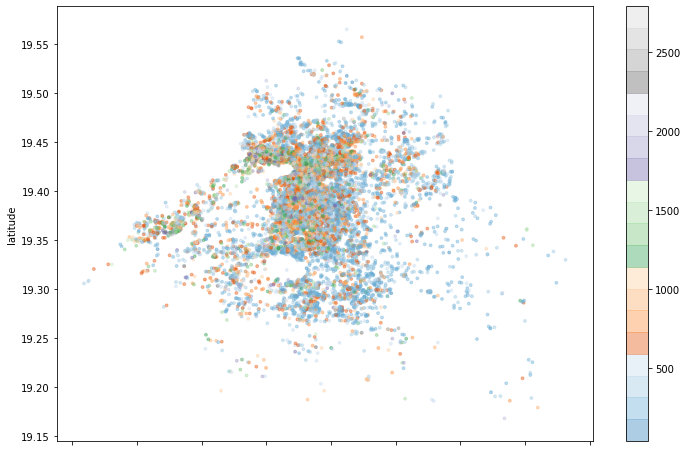

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('tab20c'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.760196392980409

O mínimo de noite são 3 dias, o que podemos deduzir que seja um  final de semana ou feriados. 

##**Conclusões**: 

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis e se esses dados não forem tratados podem sugerir interpretações equivocadas. 

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.





